In [6]:
#Code to claculate thresholds via Fast Statistical Algorithm by Panigrahi Sir
import cv2
import numpy as np
import math

img = cv2.imread(r"C:\Users\Quantumdevice\Downloads\8-bit-256-x-256-Grayscale-Lena-Image.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
a = 0
b = 255
n = 4 # number of thresholds (better choose even value)
k = 0.7 # free variable to take any positive value
A = [] # list which will contain 'n' thresholds

def multiThresh(img, a, b):
    if a>b:
        s=-1
        m=-1
        return m,s

    img = np.array(img)
    t1 = (img>=a)
    t2 = (img<=b)
    X = np.multiply(t1,t2)
    Y = np.multiply(img,X)
    s = np.sum(X)
    m = np.sum(Y)/s
    return m,s

for i in range(int(n/2-1)):
    img = np.array(img)
    t1 = (img>=a)
    t2 = (img<=b)
    X = np.multiply(t1,t2)
    Y = np.multiply(img,X)
    mu = np.sum(Y)/np.sum(X)

    Z = Y - mu
    Z = np.multiply(Z,X)
    W = np.multiply(Z,Z)
    sigma = math.sqrt(np.sum(W)/np.sum(X))

    T1 = mu - k*sigma
    T2 = mu + k*sigma

    x, y = multiThresh(img, a, T1)
    w, z = multiThresh(img, T2, b)

    A.append(x)
    A.append(w)

    a = T1+1
    b = T2-1
    k = k*(i+1)

T1 = mu
T2 = mu+1
x, y = multiThresh(img, a, T1)
w, z = multiThresh(img, T2, b)    
A.append(x)
A.append(w)
A.sort()
print(A)

[57.99588726261038, 106.87706158871804, 141.00948479066113, 184.8432613787428]


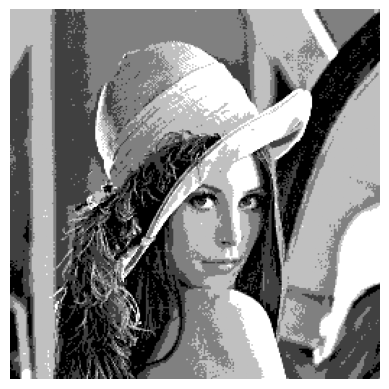

In [7]:

import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import threshold_multiotsu

# 

# Load the image
img = cv2.imread(r"C:\Users\Quantumdevice\Downloads\8-bit-256-x-256-Grayscale-Lena-Image.png", 0)

# Define the thresholds
thresholds = A

# Create an empty numpy array to store the thresholded images
thresholded_images = np.zeros_like(img) 

# Apply the thresholding at each level
for i, thresh in enumerate(thresholds):
    thresholded_images[img >= thresh] = i+1  # set values for pixels above threshold

# Plot the result
plt.imshow(thresholded_images, cmap='gray')
plt.axis('off')
plt.show()
#save this image and find out its histogram for object identifiaction, 0)



Multi-Otsu Thresholds: [ 72 112 143 179]


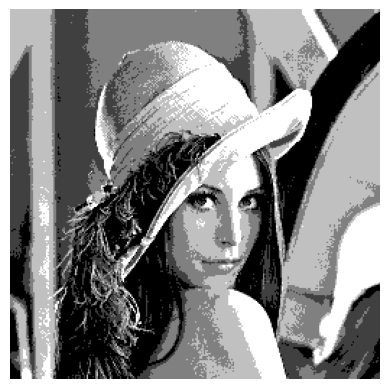

In [8]:
#Code to calculate thresholds via Multi Otsu Algorithm
import cv2
from skimage.filters import threshold_multiotsu

# Load the image
image = cv2.imread(r"C:\Users\Quantumdevice\Downloads\8-bit-256-x-256-Grayscale-Lena-Image.png", 0)  # Convert to grayscale

# Calculate multi-Otsu thresholds
thresholds = threshold_multiotsu(image, classes=5)

# Print the threshold values
print("Multi-Otsu Thresholds:", thresholds)


# Create an empty numpy array to store the thresholded images
thresholded_images = np.zeros_like(img) 

# Apply the thresholding at each level
for i, thresh in enumerate(thresholds):
    thresholded_images[img >= thresh] = i+1  # set values for pixels above threshold

# Plot the result
plt.imshow(thresholded_images, cmap='gray')
plt.axis('off')
plt.show()
#save this image and find out its histogram for object identifiaction, 0)



In [9]:
#Proposed Algorithm
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
q=[]
img = cv.imread(r"C:\Users\Quantumdevice\Downloads\8-bit-256-x-256-Grayscale-Lena-Image.png", 0)
img_np     = np.array(img)
gray_hist = cv.calcHist([img], [0], None, [256], [0,256])

print (img_np)
img_dim    = np.ndim(img_np)
img_shape  = np.shape(img_np)
img_y_max  = img_shape[0]
img_x_max  = img_shape[1]
for x_idx in range(img_x_max):
    for y_idx in range(img_y_max):
        pixel_val = img_np[y_idx, x_idx]
        q.append(pixel_val)
#print (q)




[[161 161 157 ... 169 169 126]
 [161 161 157 ... 171 169 126]
 [163 155 159 ... 149 124  62]
 ...
 [ 54  46  52 ...  88  92  90]
 [ 42  46  46 ...  96 104  98]
 [ 44  50  46 ... 104 104 108]]


In [10]:
import plotly.express as px
import pandas as pd
from plotly.offline import plot 

df = pd.DataFrame({"Pixel":q})

fig = px.histogram(df,x="Pixel",nbins=256)
fig.show()
plot(fig)


'temp-plot.html'

In [11]:
def Gaussian(delta, y, x):
    return ((2*np.pi*(delta**2))**(-1/2))*np.exp(-(y-x)**2/(2*delta**2))

In [12]:
num_qubits = int(np.log2(255)) + 1
superposed_vector = np.zeros(2**num_qubits,dtype = int)  
for i in range(2**num_qubits):    # i ranges from 0 to 2**N,
    if i in q: 
        superposed_vector[i]=1

print(superposed_vector)
print(len(superposed_vector))


[0 0 0 0 1 0 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1]
256


In [13]:
y = 50        #mean of the distribution, the point around which unsharp measurement is to be done 
delta = 10      #width of the distribution
k = 0 
diagonal = []
E_00000000 =  np.array(np.zeros((256, 256), dtype = int))
for i in range(len(E_00000000[0])):
    #for j in range(len(E_000000[0])):
    #   if i == j:
    diagonal.append( (10**4)*Gaussian(delta,y,i ))

#print(diagonal)
for i in range(len(E_00000000[0])):
    for j in range(len(E_00000000[0])):
        if i == j:
            E_00000000[i][j] = diagonal[k]
        
            k += 1
k = E_00000000*(superposed_vector.T)
x=np.arange(len(np.diag(k)))
fig1 =  px.line(x=x, y=(np.diag(k)))



In [14]:
y =  98        #mean of the distribution, the point around which unsharp measurement is to be done 
delta = 8      #width of the distribution
k = 0 
diagonal = []
E_00000000 =  np.array(np.zeros((256, 256), dtype = int))
for i in range(len(E_00000000[0])):
    #for j in range(len(E_000000[0])):
    #   if i == j:
    diagonal.append( (10**4)*Gaussian(delta,y,i ))

#print(diagonal)
for i in range(len(E_00000000[0])):
    for j in range(len(E_00000000[0])):
        if i == j:
            E_00000000[i][j] = diagonal[k]
        
            k += 1
k = E_00000000*(superposed_vector.T)
x=np.arange(len(np.diag(k)))
fig2 =  px.line(x=x, y=(np.diag(k)))

In [15]:
y =  129        #mean of the distribution, the point around which unsharp measurement is to be done 
delta = 4      #width of the distribution
k = 0 
diagonal = []
E_00000000 =  np.array(np.zeros((256, 256), dtype = int))
for i in range(len(E_00000000[0])):
    #for j in range(len(E_000000[0])):
    #   if i == j:
    diagonal.append( (10**4)*Gaussian(delta,y,i ))

#print(diagonal)
for i in range(len(E_00000000[0])):
    for j in range(len(E_00000000[0])):
        if i == j:
            E_00000000[i][j] = diagonal[k]
        
            k += 1
k = E_00000000*(superposed_vector.T)
x=np.arange(len(np.diag(k)))
fig3 =  px.line(x=x, y=(np.diag(k)))

In [16]:
y =  155        #mean of the distribution, the point around which unsharp measurement is to be done 
delta = 10      #width of the distribution
k = 0 
diagonal = []
E_00000000 =  np.array(np.zeros((256, 256), dtype = int))
for i in range(len(E_00000000[0])):
    #for j in range(len(E_000000[0])):
    #   if i == j:
    diagonal.append( (10**4)*Gaussian(delta,y,i ))

#print(diagonal)
for i in range(len(E_00000000[0])):
    for j in range(len(E_00000000[0])):
        if i == j:
            E_00000000[i][j] = diagonal[k]
        
            k += 1
k = E_00000000*(superposed_vector.T)
x=np.arange(len(np.diag(k)))
fig4 =  px.line(x=x, y=(np.diag(k)))

In [17]:
y =  209       #mean of the distribution, the point around which unsharp measurement is to be done 
delta = 11      #width of the distribution
k = 0 
diagonal = []
E_00000000 =  np.array(np.zeros((256, 256), dtype = int))
for i in range(len(E_00000000[0])):
    #for j in range(len(E_000000[0])):
    #   if i == j:
    diagonal.append( (10**4)*Gaussian(delta,y,i ))

#print(diagonal)
for i in range(len(E_00000000[0])):
    for j in range(len(E_00000000[0])):
        if i == j:
            E_00000000[i][j] = diagonal[k]
        
            k += 1
k = E_00000000*(superposed_vector.T)
x=np.arange(len(np.diag(k)))
fig5 =  px.line(x=x, y=(np.diag(k)))

In [18]:
fig1.add_trace(fig2.data[0])
fig1.add_trace(fig3.data[0])
fig1.add_trace(fig4.data[0])
fig1.add_trace(fig5.data[0])

In [19]:

# plot(fig1)
fig.update_layout(
    title="Lena Image Histogram",
    xaxis_title="Pixels",
    yaxis_title="No. of Pixels",
    font=dict(
        family="Times New Roman, monospace",
        size=18,
        color="Black"
    )
)
fig1.update_layout(
    title="Obtained Distribution",
    xaxis_title="Pixels",
    yaxis_title="Probability Amplitude Measure",
    font=dict(
        family="Times New Roman, monospace",
        size=18,
        color="Black"
    )
)
fig.write_image("./group1.pdf")
fig1.write_image("./group2.pdf")


In [20]:
multilevels=[77,119,138,182] #calculate the multilevels by optimisation

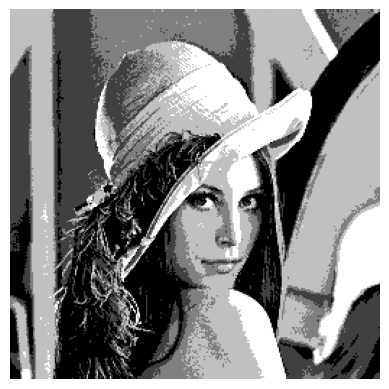

In [21]:

# Load the image
import cv2
img = cv2.imread(r"C:\Users\Quantumdevice\Downloads\8-bit-256-x-256-Grayscale-Lena-Image.png", 0)

# Define the thresholds
thresholds = multilevels

# Create an empty numpy array to store the thresholded images
thresholded_images = np.zeros_like(img) 

# Apply the thresholding at each level
for i, thresh in enumerate(thresholds):
    thresholded_images[img >= thresh] = i+1  # set values for pixels above threshold

# Plot the result
plt.imshow(thresholded_images, cmap='gray')
plt.axis('off')
plt.show()
#save this image and find out its histogram for object identifiaction, 0)


In [22]:
import cv2
import numpy as np

# Read in the images
img1 = cv2.imread(r"C:\Users\Quantumdevice\Downloads\8-bit-256-x-256-Grayscale-Lena-Image.png")
img2 = cv2.imread(r"C:\Users\Quantumdevice\Downloads\Lena recursive.png")

# Compute the mean squared error (MSE)
mse = np.mean((img1 - img2) ** 2)

# Calculate the maximum possible pixel value
max_pixel = 255.0

# Compute the PSNR
if mse == 0:
    psnr = 100
else:
    psnr = 20 * np.log10(max_pixel / np.sqrt(mse))

# Print the PSNR value
print("The PSNR value between the two images mult is:", psnr)


The PSNR value between the two images mult is: 28.016835394941015


In [23]:
import cv2
import numpy as np

# Read in the images
img1 = cv2.imread(r"C:\Users\Quantumdevice\Downloads\8-bit-256-x-256-Grayscale-Lena-Image.png")
img2 = cv2.imread(r"C:\Users\Quantumdevice\Downloads\Lena multi otsu.png")
# Compute the mean squared error (MSE)
mse = np.mean((img1 - img2) ** 2)

# Calculate the maximum possible pixel value
max_pixel = 255.0

# Compute the PSNR
if mse == 0:
    psnr = 100
else:
    psnr = 20 * np.log10(max_pixel / np.sqrt(mse))

# Print the PSNR value
print("The PSNR value between the two images multi otsu is:", psnr)


The PSNR value between the two images multi otsu is: 28.040844501767932


In [24]:
import cv2
import numpy as np

# Read in the images
img1 = cv2.imread(r"C:\Users\Quantumdevice\Downloads\8-bit-256-x-256-Grayscale-Lena-Image.png")
img2 = cv2.imread(r"C:\Users\Quantumdevice\Downloads\Lena unsharp.png")

# Compute the mean squared error (MSE)
mse = np.mean((img1 - img2) ** 2)

# Calculate the maximum possible pixel value
max_pixel = 255.0

# Compute the PSNR
if mse == 0:
    psnr = 100
else:
    psnr = 20 * np.log10(max_pixel / np.sqrt(mse))

# Print the PSNR value
print("The PSNR value between the two images unsharp is:", psnr)


The PSNR value between the two images unsharp is: 27.95083953354424


In [25]:
import cv2
from skimage import io
from skimage.metrics import structural_similarity as ssim

# Load the two images you want to compare
image1 = cv2.imread(r"C:\Users\Quantumdevice\Downloads\8-bit-256-x-256-Grayscale-Lena-Image.png")
image2 = cv2.imread(r"C:\Users\Quantumdevice\Downloads\Lena unsharp.png")

# Convert the images to grayscale if they are in color
if image1.shape[-1] == 3:
    image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
if image2.shape[-1] == 3:
    image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

# Calculate SSIM between the two images
ssim_score = ssim(image1, image2)

# Print the SSIM score
print(f"SSIM Score unsharp: {ssim_score:.4f}")

SSIM Score unsharp: 0.2503


In [26]:
import cv2
from skimage import io
from skimage.metrics import structural_similarity as ssim

# Load the two images you want to compare
image1 = cv2.imread(r"C:\Users\Quantumdevice\Downloads\8-bit-256-x-256-Grayscale-Lena-Image.png")
image2 = cv2.imread(r"C:\Users\Quantumdevice\Downloads\Lena multi otsu.png")

# Convert the images to grayscale if they are in color
if image1.shape[-1] == 3:
    image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
if image2.shape[-1] == 3:
    image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

# Calculate SSIM between the two images
ssim_score = ssim(image1, image2)

# Print the SSIM score
print(f"SSIM Score otsu: {ssim_score:.4f}")

SSIM Score otsu: 0.2540


In [27]:
import cv2
from skimage import io
from skimage.metrics import structural_similarity as ssim

# Load the two images you want to compare
image1 = cv2.imread(r"C:\Users\Quantumdevice\Downloads\8-bit-256-x-256-Grayscale-Lena-Image.png")
image2 = cv2.imread(r"C:\Users\Quantumdevice\Downloads\Lena recursive.png")

# Convert the images to grayscale if they are in color
if image1.shape[-1] == 3:
    image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
if image2.shape[-1] == 3:
    image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

# Calculate SSIM between the two images
ssim_score = ssim(image1, image2)

# Print the SSIM score
print(f"SSIM Score recursive: {ssim_score:.4f}")

SSIM Score recursive: 0.2626
